# Illustrates function iteration, Newton, and secant methods

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demslv06.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Sept-04</i>
<hr>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [2]:
bullet_options = dict(ms=16, marker='.', ls='')

### Function Iteration

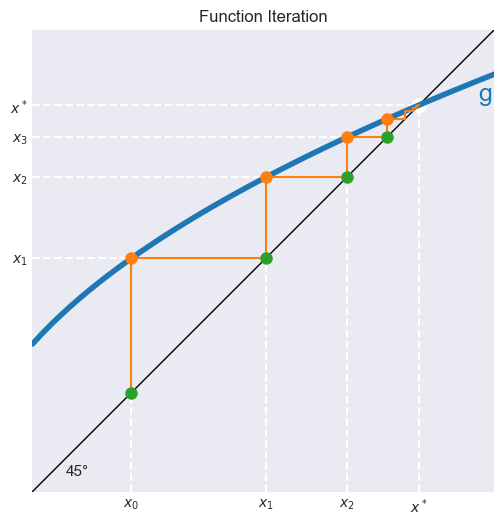

In [3]:
def g(x):
    return (x + 0.2)**0.5

xmin, xmax = 0.0, 1.4
xinit, xstar = 0.3, 0.5*(1 + np.sqrt(1.8))
xx = np.linspace(xmin,xmax)
yy = g(xx)

n = 21
z = np.zeros(n)
z[0] = xinit
for k in range(n-1):
    z[k+1] = g(z[k])
x, y = z[:-1], z[1:]

xticks = x[:3].tolist() + [xstar]
yticks = y[:3].tolist() + [xstar]

fig1, ax = plt.subplots(figsize=[6,6])
ax.set(
    aspect=1.0,
    title='Function Iteration',
    xlim=[xmin,xmax],
    ylim=[xmin,xmax],
    xticks=xticks,
    xticklabels=['$x_0$', '$x_1$', '$x_2$', '$x^*$'],
    yticks=yticks,
    yticklabels=['$x_1$', '$x_2$', '$x_3$', '$x^*$']
    )

ax.vlines(xticks, xmin, xticks, colors='white', linestyles='--')
ax.hlines(yticks, xmin, yticks, colors='white', linestyles='--')


ax.plot(xstar,xstar,color='white', marker='.', ms=20)
ax.plot(xx,xx,'k-', linewidth=1)
ax.plot(xx,yy,linewidth=4)
ax.step(x,x,'C1')
ax.plot(x[:4], x[:4], color='C2', **bullet_options)
ax.plot(x[:4], y[:4], color='C1', **bullet_options)
ax.annotate('45°', [xmin+0.1,xmin+0.05], ha='left', fontsize=11)
ax.annotate('g', [xmax-0.05, g(xmax)-0.08], ha='left',fontsize=18, color='C0');

### Newton's Method

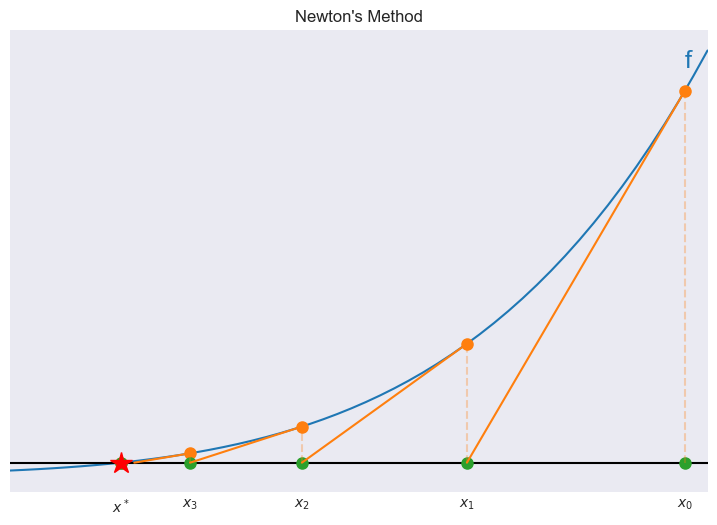

In [4]:
def f(x):
    return x**5 - 3, 5*x**4

xmin, xmax = 1.0, 2.55
xinit, xstar = xmax-0.05, 3**(1/5)
xx = np.linspace(xmin, xmax)
yy, dyy = f(xx)

n = 5
x, y = np.zeros(n), np.zeros(n)
x[0] = xinit
for k in range(n-1):
    y[k], dlag = f(x[k])
    x[k+1] = x[k] - y[k]/dlag

xticks = np.array(x[:4].tolist() + [xstar])

fig2, ax = plt.subplots(figsize=[9,6])
ax.set(
    title="Newton's Method",
    xlim=[xmin,xmax], 
    xticks=xticks,
    xticklabels= ['$x_0$', '$x_1$', '$x_2$','$x_3$', '$x^*$'],
    yticks=[]
    )
    
ax.plot(xx,yy)
ax.axhline(0, color='k')
ax.annotate('f',[xinit,f(xinit+0.03)[0]], fontsize=18, color='C0')
ax.plot(xticks, f(xticks)[0], color='C1', **bullet_options)
ax.plot(xticks, 0*xticks, color='C2', **bullet_options)

ax.plot(xstar, 0, color='r', marker='*', ms=16)

for xi,xinext,yi in zip(x,x[1:],y):
    ax.vlines(xi,0, yi,colors='C1', linestyle='--', alpha=0.3)
    ax.plot([xi,xinext],[yi, 0], color='C1')

### Secant Method

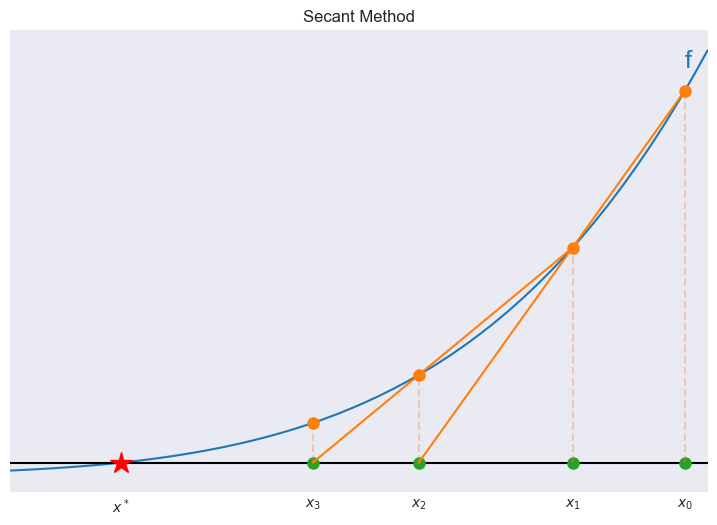

In [5]:
from turtle import title


def f(x):
    return x**5 - 3

xmin, xmax = 1.0, 2.55
xinit, xstar = xmax-0.05, 3**(1/5)
xx = np.linspace(xmin, xmax)
yy = f(xx)

n = 4
x = np.zeros(n)
x[:2] = xinit, xinit-0.25
y = f(x)
for i in range(2,n):
    x[i] = x[i-1] - y[i-1]*(x[i-1]-x[i-2]) / (y[i-1]-y[i-2])
    y[i] = f(x[i])
  

xticks=np.array(x[:4].tolist() + [xstar])

fig3, ax = plt.subplots(figsize=[9,6])
ax.set(
    title="Secant Method",
    xlim=[xmin,xmax],
    xticks=xticks,
    xticklabels=['$x_0$', '$x_1$', '$x_2$','$x_3$', '$x^*$'],
    yticks=[]
    )

ax.plot(xx,yy)
ax.axhline(0, color='k')
ax.annotate('f', [xinit,f(xinit+0.03)], fontsize=18,color='C0')
ax.plot(x, y, color='C1', **bullet_options)
ax.plot(x, 0*y, color='C2', **bullet_options)

ax.vlines(x, 0, y, colors='C1', linestyles='--', alpha=0.3)

for xi,xinext,yi in zip(x,x[2:],y):
    ax.plot([xi,xinext],[yi, 0], color='C1')

ax.plot(xstar, 0, color='red', marker='*', ms=16)